In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Programming\ML_DATA\\mall customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(columns={'Spending Score (1-100)' : 'score' , 'Annual Income (k$)':'income'}, inplace=True)

In [4]:
df.head()

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.drop('CustomerID',axis=1,inplace=True)

In [6]:
df.head()

,Gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [9]:
df['Gender'] = le.fit_transform(df['Gender'])

In [10]:
df.corr() # show dataset corr value 

,Gender,Age,income,score
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
income,0.056410,-0.012398,1.000000,0.009903
score,-0.058109,-0.327227,0.009903,1.000000


<AxesSubplot:>

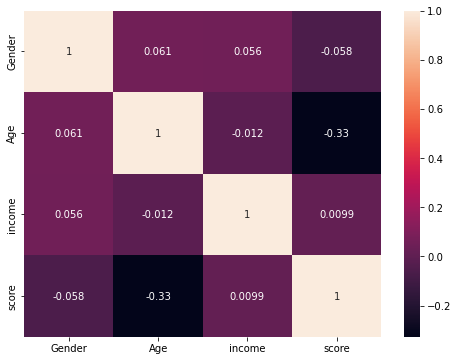

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

# Visualization

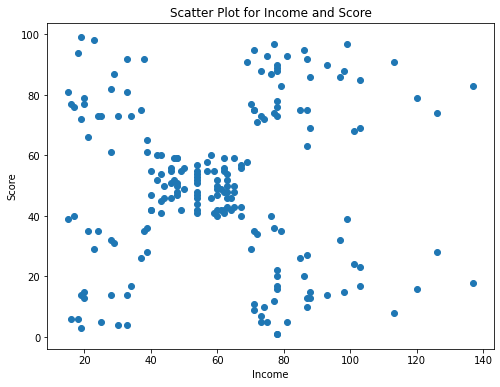

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(df['income'],df['score'])
plt.title('Scatter Plot for Income and Score')
plt.xlabel("Income")
plt.ylabel("Score")
plt.show()

<Figure size 720x432 with 0 Axes>

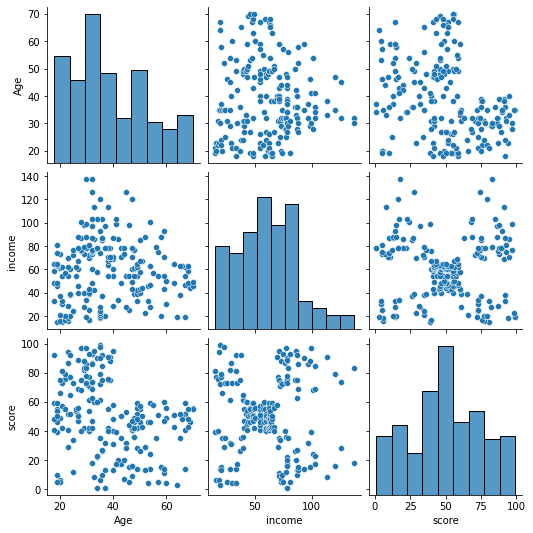

In [13]:
plt.figure(figsize=(10,6))
sns.pairplot(df[['Age','income','score']])
plt.show()

# KMeans cluster

In [14]:
import sklearn.cluster as cluster

In [15]:
kmeans = cluster.KMeans()

In [16]:
kmeans.fit(df[['Gender','Age','income', 'score']])

KMeans()

In [17]:
df['cluster'] = kmeans.predict(df[['Gender','Age','income', 'score']])

In [18]:
df.head()

,Gender,Age,income,score,cluster
0,1,19,15,39,5
1,1,21,15,81,3
2,0,20,16,6,5
3,0,23,16,77,3
4,0,31,17,40,5


In [19]:
kmeans.cluster_centers_ # Show Centered Value

array([[  0.46428571,  32.78571429,  78.03571429,  81.89285714],
       [  0.44444444,  56.15555556,  53.37777778,  49.08888889],
       [  0.65384615,  41.23076923,  79.26923077,  15.92307692],
       [  0.40909091,  25.27272727,  25.72727273,  79.36363636],
       [  0.3       ,  41.        , 109.7       ,  22.        ],
       [  0.38095238,  44.14285714,  25.14285714,  19.52380952],
       [  0.45454545,  32.45454545, 108.18181818,  82.72727273],
       [  0.35135135,  27.10810811,  56.2972973 ,  49.67567568]])

In [20]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]
df4=df[df.cluster==4]
df5=df[df.cluster==5]
df6=df[df.cluster==6]
df7=df[df.cluster==7]


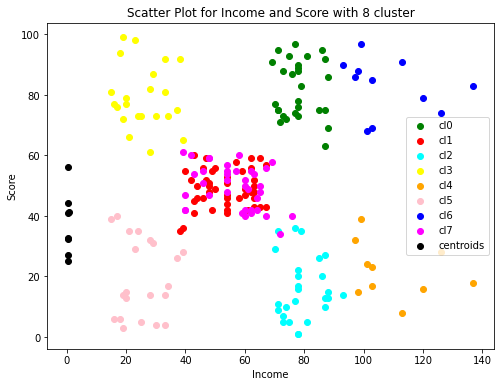

In [21]:
plt.figure(figsize=(8,6))
cluster=kmeans.cluster_centers_
plt.scatter(df0['income'], df0['score'], color='green', label='cl0')
plt.scatter(df1['income'], df1['score'], color='red', label='cl1')
plt.scatter(df2['income'], df2['score'], color='cyan', label='cl2')
plt.scatter(df3['income'], df3['score'], color='yellow', label='cl3')
plt.scatter(df4['income'], df4['score'], color='orange', label='cl4')
plt.scatter(df5['income'], df5['score'], color='pink', label='cl5')
plt.scatter(df6['income'], df6['score'], color='blue', label='cl6')
plt.scatter(df7['income'], df7['score'], color='magenta', label='cl7')
plt.scatter(cluster[:,0],cluster[:,1],color='black',label='centroids')
plt.title('Scatter Plot for Income and Score with 8 cluster')
plt.xlabel("Income")
plt.ylabel("Score")
plt.legend()

# Select Optimal Number Of Clusters

In [40]:
from sklearn.cluster import KMeans
wcss = []
c = range(1,15)
for i in c:
    kmeans2 = KMeans(n_clusters=i) 
    kmeans2.fit(df[['Gender','Age','income', 'score']])
    wcss.append(kmeans2.inertia_) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [41]:
wcss

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75399.61541401486,
 58348.64136331505,
 51130.690081263754,
 44357.32664902663,
 40956.77989342179,
 37219.20852110852,
 34775.72281884781,
 32124.985485810466,
 29425.26564454064,
 27665.754594631373]

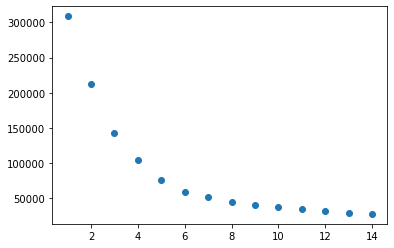

In [42]:
plt.scatter(c,wcss)

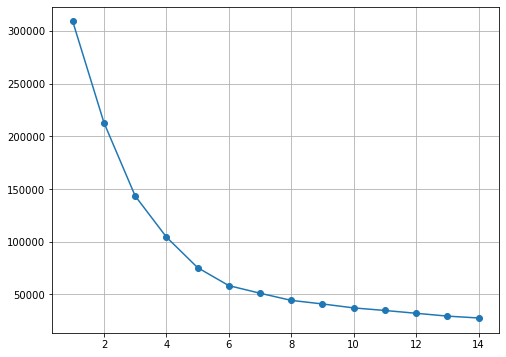

In [43]:
plt.figure(figsize=(8,6))
plt.plot(c,wcss,marker='o')
plt.grid()
plt.show()

In [44]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [45]:
from kneed import KneeLocator 

In [46]:
kn = KneeLocator(c, wcss, curve='convex', direction = 'decreasing')

In [47]:
kn.knee

5

In [48]:
print('Optimal number of clusters =', kn.knee)

Optimal number of clusters = 5


# After Tuning

In [49]:
import sklearn.cluster as cluster2

In [50]:
kmean3 = cluster2.KMeans(n_clusters=5)

In [51]:
df['new_cluster'] = kmean3.fit_predict(df[['Gender','Age','income', 'score']])

In [52]:
df.head()

,Gender,Age,income,score,cluster,new_cluster
0,1,19,15,39,5,2
1,1,21,15,81,3,3
2,0,20,16,6,5,2
3,0,23,16,77,3,3
4,0,31,17,40,5,2


In [53]:
centers2 = kmean3.cluster_centers_

In [54]:
centers2

array([[ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513]])

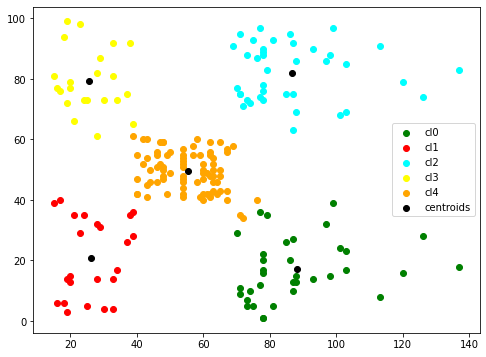

In [37]:
df0 = df[df.new_cluster == 0]
df1 = df[df.new_cluster == 1]
df2 = df[df.new_cluster == 2]
df3 = df[df.new_cluster == 3]
df4 = df[df.new_cluster == 4]

plt.figure(figsize=(8,6))

plt.scatter(df0['income'], df0['score'], color='green', label='cl0')
plt.scatter(df1['income'], df1['score'], color='red', label='cl1')
plt.scatter(df2['income'], df2['score'], color='cyan', label='cl2')
plt.scatter(df3['income'], df3['score'], color='yellow', label='cl3')
plt.scatter(df4['income'], df4['score'], color='orange', label='cl4')

plt.scatter(centers2[:,0] , centers2[:,1], color='black',label='centroids')

plt.legend()